In [1]:
from sklearn.datasets import *
import pandas as pd
Q1_data=load_breast_cancer()

In [2]:
data = pd.DataFrame(Q1_data.data,columns=Q1_data.feature_names)
sy = pd.Series(Q1_data.target,dtype='category')
sy= sy.cat.rename_categories(Q1_data.target_names)
data['Y']=sy
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,malignant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,malignant
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,malignant
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,malignant
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,malignant


In [3]:
len(Q1_data.feature_names)

30

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

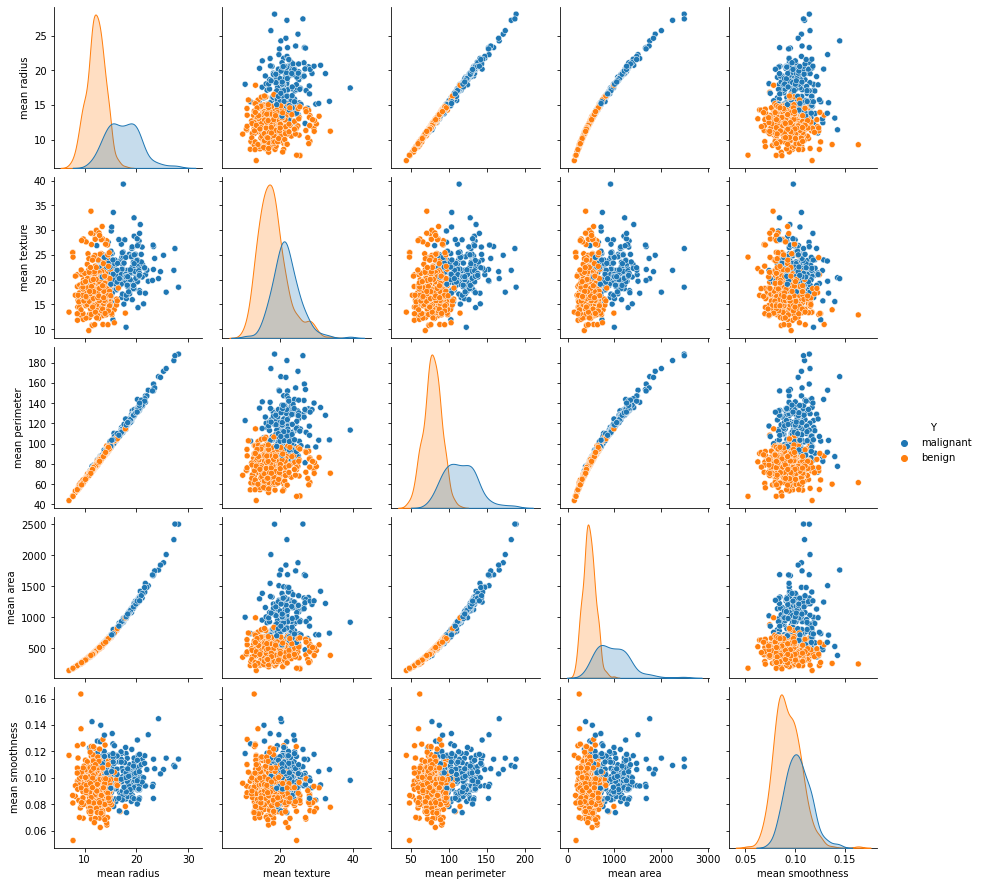

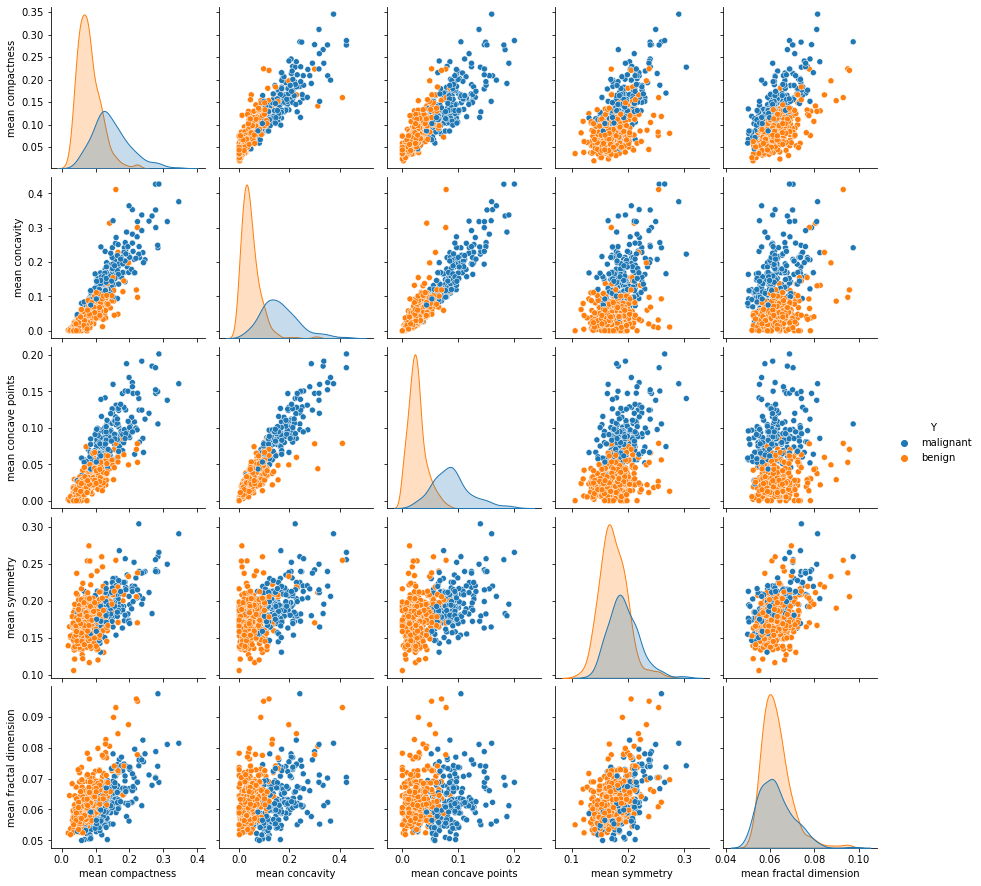

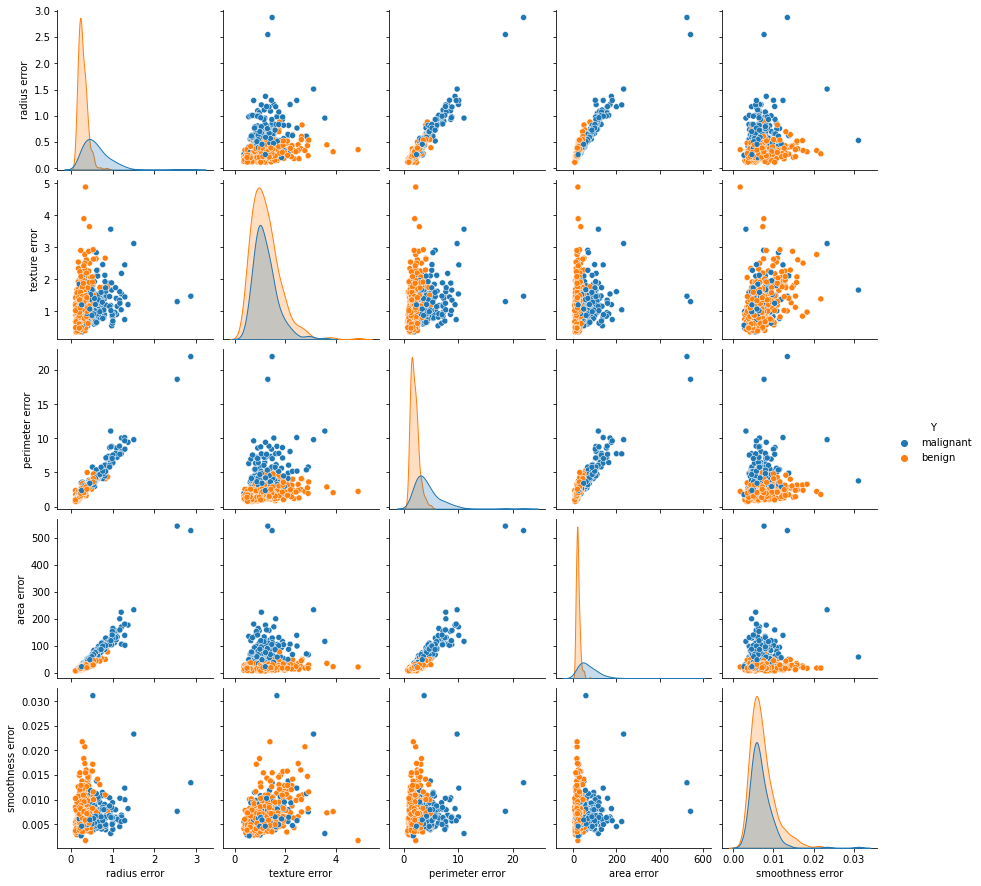

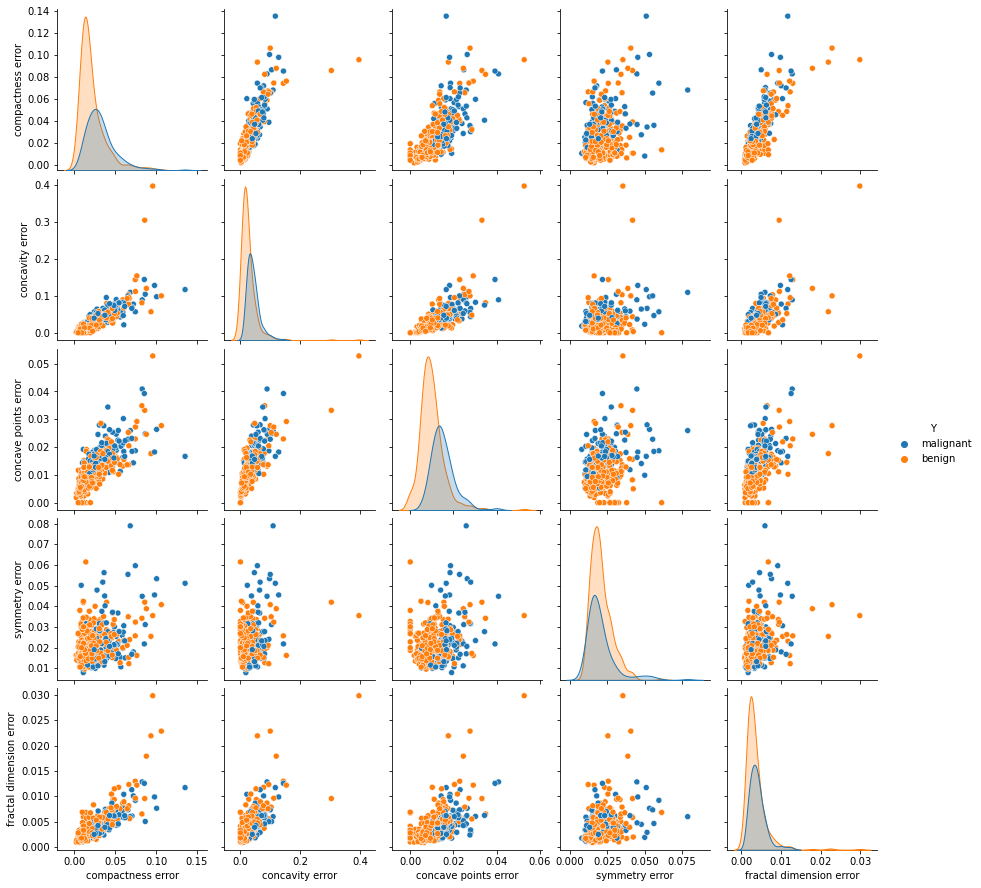

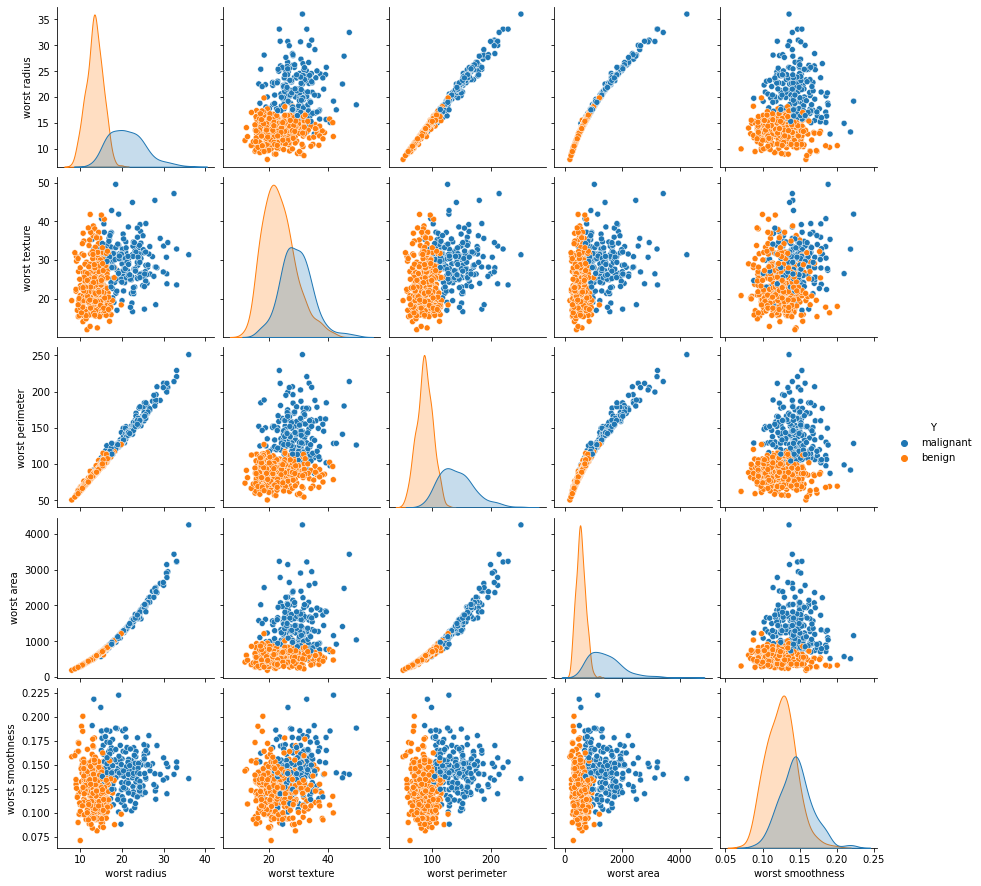

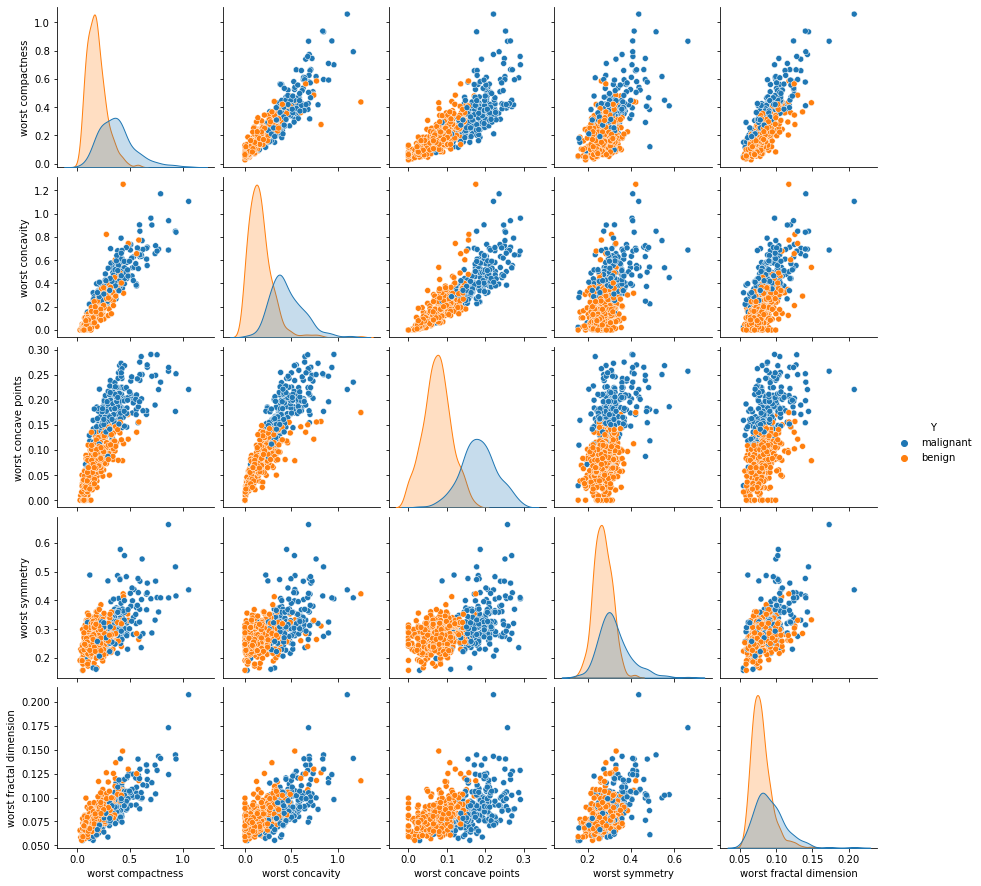

In [5]:
for i in range(6):
    k=Q1_data.feature_names[5*i:5+(5*i)]
    sns.pairplot(vars=k,
             data=data,hue='Y')
    plt.show()
    

In [6]:
X_data=data[['mean radius',
             'mean perimeter',
             'mean area',
             'mean concave points',
             'mean symmetry']].values
Y_data=Q1_data.target
from tensorflow.keras.utils import to_categorical
Y_data=to_categorical(Y_data)

In [7]:
from sklearn.model_selection import train_test_split
t_x,tt_x,t_y,tt_y=train_test_split(X_data,Y_data,random_state=1)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [8]:
m=Sequential()
m.add(Dense(2, input_dim=5,activation='sigmoid'))
m.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
hy = m.fit(t_x, t_y, epochs = 200, batch_size = 1, validation_data = (tt_x, tt_y))

Epoch 1/200
426/426 [==============================] - 2s 2ms/step - loss: 77.4588 - binary_accuracy: 0.3650 - val_loss: 39.6842 - val_binary_accuracy: 0.2832
Epoch 2/200
426/426 [==============================] - 0s 510us/step - loss: 14.3926 - binary_accuracy: 0.3580 - val_loss: 2.7262 - val_binary_accuracy: 0.5455
Epoch 3/200
426/426 [==============================] - 0s 512us/step - loss: 2.3830 - binary_accuracy: 0.5235 - val_loss: 1.8643 - val_binary_accuracy: 0.4825
Epoch 4/200
426/426 [==============================] - 0s 505us/step - loss: 1.6245 - binary_accuracy: 0.5293 - val_loss: 1.7754 - val_binary_accuracy: 0.7063
Epoch 5/200
426/426 [==============================] - 0s 488us/step - loss: 1.0252 - binary_accuracy: 0.5575 - val_loss: 0.8369 - val_binary_accuracy: 0.6503
Epoch 6/200
426/426 [==============================] - 0s 514us/step - loss: 0.6075 - binary_accuracy: 0.7148 - val_loss: 0.6293 - val_binary_accuracy: 0.7622
Epoch 7/200
426/426 [========================

426/426 [==============================] - 0s 638us/step - loss: 0.3401 - binary_accuracy: 0.8439 - val_loss: 0.4129 - val_binary_accuracy: 0.8182
Epoch 53/200
426/426 [==============================] - 0s 684us/step - loss: 0.3478 - binary_accuracy: 0.8638 - val_loss: 0.4209 - val_binary_accuracy: 0.8566
Epoch 54/200
426/426 [==============================] - 0s 615us/step - loss: 0.3415 - binary_accuracy: 0.8533 - val_loss: 0.4677 - val_binary_accuracy: 0.8287
Epoch 55/200
426/426 [==============================] - 1s 1ms/step - loss: 0.3245 - binary_accuracy: 0.8697 - val_loss: 0.6181 - val_binary_accuracy: 0.7483
Epoch 56/200
426/426 [==============================] - 1s 2ms/step - loss: 0.3453 - binary_accuracy: 0.8721 - val_loss: 0.4341 - val_binary_accuracy: 0.8497
Epoch 57/200
426/426 [==============================] - 1s 2ms/step - loss: 0.3372 - binary_accuracy: 0.8638 - val_loss: 0.3976 - val_binary_accuracy: 0.8392
Epoch 58/200
426/426 [==============================] - 1s 

Epoch 104/200
426/426 [==============================] - 0s 440us/step - loss: 0.3483 - binary_accuracy: 0.8545 - val_loss: 0.5327 - val_binary_accuracy: 0.7657
Epoch 105/200
426/426 [==============================] - 0s 459us/step - loss: 0.3390 - binary_accuracy: 0.8627 - val_loss: 0.5129 - val_binary_accuracy: 0.7727
Epoch 106/200
426/426 [==============================] - 0s 444us/step - loss: 0.3411 - binary_accuracy: 0.8592 - val_loss: 0.3767 - val_binary_accuracy: 0.8706
Epoch 107/200
426/426 [==============================] - 0s 448us/step - loss: 0.3370 - binary_accuracy: 0.8568 - val_loss: 0.3751 - val_binary_accuracy: 0.8462
Epoch 108/200
426/426 [==============================] - 0s 439us/step - loss: 0.3274 - binary_accuracy: 0.8662 - val_loss: 0.4221 - val_binary_accuracy: 0.8042
Epoch 109/200
426/426 [==============================] - 0s 441us/step - loss: 0.3127 - binary_accuracy: 0.8627 - val_loss: 0.4308 - val_binary_accuracy: 0.8077
Epoch 110/200
426/426 [===========

Epoch 155/200
426/426 [==============================] - 0s 402us/step - loss: 0.3119 - binary_accuracy: 0.8744 - val_loss: 0.3563 - val_binary_accuracy: 0.8392
Epoch 156/200
426/426 [==============================] - 0s 442us/step - loss: 0.3004 - binary_accuracy: 0.8779 - val_loss: 0.4254 - val_binary_accuracy: 0.8182
Epoch 157/200
426/426 [==============================] - 0s 450us/step - loss: 0.3262 - binary_accuracy: 0.8615 - val_loss: 0.3621 - val_binary_accuracy: 0.8601
Epoch 158/200
426/426 [==============================] - 0s 431us/step - loss: 0.3061 - binary_accuracy: 0.8756 - val_loss: 0.3792 - val_binary_accuracy: 0.8112
Epoch 159/200
426/426 [==============================] - 0s 429us/step - loss: 0.3154 - binary_accuracy: 0.8732 - val_loss: 0.3539 - val_binary_accuracy: 0.8427
Epoch 160/200
426/426 [==============================] - 0s 442us/step - loss: 0.3031 - binary_accuracy: 0.8862 - val_loss: 0.4856 - val_binary_accuracy: 0.7797
Epoch 161/200
426/426 [===========

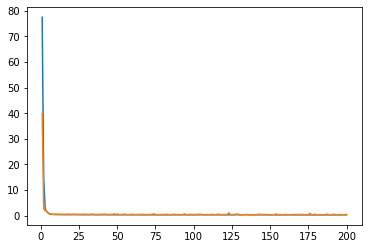

In [9]:
import matplotlib.pyplot as plt
ec=range(1,len(hy.history['binary_accuracy'])+1)
plt.plot(ec,hy.history['loss'])
plt.plot(ec,hy.history['val_loss'])